# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)  #print(zip(lats, lngs)) --> Prints location of memory where zip of these 2 valriables is saved; not the value

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

In [3]:
cities_pd = pd.DataFrame(columns = {'Cities'}, data=cities)
cities_pd['Cloudiness'] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Humidity"] = ""
cities_pd["Lat"] = ""
cities_pd["Lon"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""
cities_pd.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,oktyabrskiy,,,,,,,,
1,doctor pedro p. pena,,,,,,,,
2,ribeira grande,,,,,,,,
3,nikolskoye,,,,,,,,
4,samfya,,,,,,,,


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

counter = 0
sets = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in cities_pd.iterrows():
    city = row['Cities']
    response = requests.get(base_url + city + "&appid=" + weather_api_key + "&units=imperial").json()
    time.sleep(1)
    try:
        print(f"Processing Record {counter} of Set {sets} | {response['name']}")
        cities_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_pd.loc[index, 'Country'] = response['sys']['country']
        cities_pd.loc[index, 'Date'] = response['dt']
        cities_pd.loc[index, 'Humidity'] = response['main']['humidity']
        cities_pd.loc[index, 'Lat'] = response['coord']['lat']
        cities_pd.loc[index, 'Lon'] = response['coord']['lon']
        cities_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_pd.loc[index, 'Wind Speed'] = response['wind']['speed']
    except Exception as exc:
        print(exc)
        print("City not found. Skipping...")
    finally:
        if counter == 49:
            counter = 0
            sets += 1
        else:
            counter += 1 

        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | Oktyabr'skiy
'name'
City not found. Skipping...
Processing Record 2 of Set 1 | Ribeira Grande
Processing Record 3 of Set 1 | Nikolskoye
Processing Record 4 of Set 1 | Samfya
Processing Record 5 of Set 1 | Albany
Processing Record 6 of Set 1 | Vaini
Processing Record 7 of Set 1 | New Norfolk
Processing Record 8 of Set 1 | Katsuura
Processing Record 9 of Set 1 | Tiznit Province
'name'
City not found. Skipping...
Processing Record 11 of Set 1 | Hilo
Processing Record 12 of Set 1 | Muros
Processing Record 13 of Set 1 | Ulladulla
Processing Record 14 of Set 1 | Pedernales
Processing Record 15 of Set 1 | Hobart
Processing Record 16 of Set 1 | Puerto Ayora
Processing Record 17 of Set 1 | Jamestown
Processing Record 18 of Set 1 | Manama
Processing Record 19 of Set 1 | Rikitea
Processing Record 20 of Set 1 | Srednekolymsk
Processing Record 21 of Set 1 | Chebsara
Processing Record 22 of Set 1 | Atuona
Processin

Processing Record 0 of Set 5 | Iranshahr
Processing Record 1 of Set 5 | Jasper
Processing Record 2 of Set 5 | Codrington
Processing Record 3 of Set 5 | Mahébourg
Processing Record 4 of Set 5 | Rapid Valley
Processing Record 5 of Set 5 | Iquique
Processing Record 6 of Set 5 | Bethel
Processing Record 7 of Set 5 | Khuzhir
Processing Record 8 of Set 5 | Aksu
Processing Record 9 of Set 5 | Gua Musang
Processing Record 10 of Set 5 | Duki
'name'
City not found. Skipping...
'name'
City not found. Skipping...
Processing Record 13 of Set 5 | Bexhill
Processing Record 14 of Set 5 | Walvis Bay
Processing Record 15 of Set 5 | Chui
Processing Record 16 of Set 5 | San Patricio
Processing Record 17 of Set 5 | Kisangani
Processing Record 18 of Set 5 | Pacific Grove
Processing Record 19 of Set 5 | Marsaxlokk
Processing Record 20 of Set 5 | Coahuayana Viejo
Processing Record 21 of Set 5 | Gao
Processing Record 22 of Set 5 | Along
Processing Record 23 of Set 5 | Termoli
Processing Record 24 of Set 5 | Po

Processing Record 2 of Set 9 | Mandera
Processing Record 3 of Set 9 | Moctezuma
Processing Record 4 of Set 9 | Egvekinot
Processing Record 5 of Set 9 | Huaicheng
Processing Record 6 of Set 9 | Velikiy Ustyug
Processing Record 7 of Set 9 | Murgab
Processing Record 8 of Set 9 | Praia
Processing Record 9 of Set 9 | Port Blair
Processing Record 10 of Set 9 | Motygino
Processing Record 11 of Set 9 | Pitiquito
Processing Record 12 of Set 9 | Feijó
Processing Record 13 of Set 9 | Vanimo
Processing Record 14 of Set 9 | Kaeo
'name'
City not found. Skipping...
Processing Record 16 of Set 9 | Shirokiy
Processing Record 17 of Set 9 | Orán
Processing Record 18 of Set 9 | Lishui
Processing Record 19 of Set 9 | Anamur
Processing Record 20 of Set 9 | Svenstrup
Processing Record 21 of Set 9 | Barra de Tecoanapa
Processing Record 22 of Set 9 | Souillac
Processing Record 23 of Set 9 | Trairi
Processing Record 24 of Set 9 | La Ronge
Processing Record 25 of Set 9 | Deer Lake
Processing Record 26 of Set 9 |

Processing Record 0 of Set 13 | Vung Tau
'name'
City not found. Skipping...
Processing Record 2 of Set 13 | Rusape
Processing Record 3 of Set 13 | Masingbi
Processing Record 4 of Set 13 | Naliya
-----------------------------
Data Retrieval Complete
-----------------------------


In [5]:
cities_pd.count()

Cities        605
Cloudiness    605
Country       605
Date          605
Humidity      605
Lat           605
Lon           605
Max Temp      605
Wind Speed    605
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cities_cleaned = cities_pd
cities_cleaned.replace('', np.nan, inplace=True)
cities_cleaned.dropna(subset=['Cloudiness'], inplace=True)

cities_cleaned.count()

Cities        555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lon           555
Max Temp      555
Wind Speed    555
dtype: int64

In [7]:
cities_cleaned.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,oktyabrskiy,68.0,RU,1.584065e+09,96.0,54.48,53.47,33.64,9.13
2,ribeira grande,25.0,PT,1.584065e+09,83.0,38.52,-28.70,55.51,8.66
3,nikolskoye,90.0,RU,1.584065e+09,96.0,59.70,30.79,35.01,6.71
4,samfya,100.0,ZM,1.584065e+09,98.0,-11.36,29.56,64.09,2.24
5,albany,75.0,US,1.584065e+09,85.0,42.60,-73.97,48.20,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_cleaned.to_csv("weather.csv")
cities_cleaned.count()

Cities        555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lon           555
Max Temp      555
Wind Speed    555
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Max Temp variations for each city on March 3, 2020


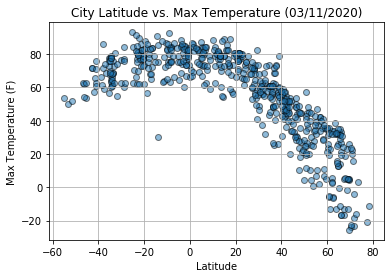

In [13]:
plt.scatter(cities_cleaned['Lat'],cities_cleaned['Max Temp'],marker='o',alpha=0.5,edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (03/11/2020)")
plt.savefig('Latitude vs. Temperature Plot.PNG')
print("Max Temp variations for each city on March 3, 2020")

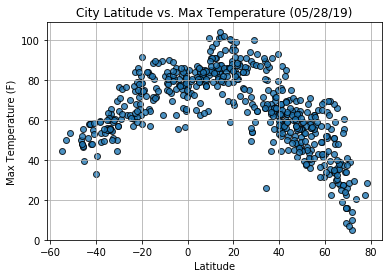

In [6]:
##Starter Graph

#### Latitude vs. Humidity Plot

Humidity variations for each city on March 3, 2020


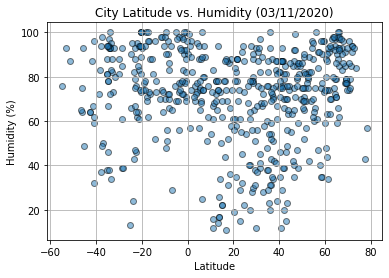

In [14]:
plt.scatter(cities_cleaned['Lat'],cities_cleaned['Humidity'],marker='o',alpha=0.5,edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (03/11/2020)")
plt.savefig('Latitude vs. Humidity Plot.PNG')
print("Humidity variations for each city on March 3, 2020")

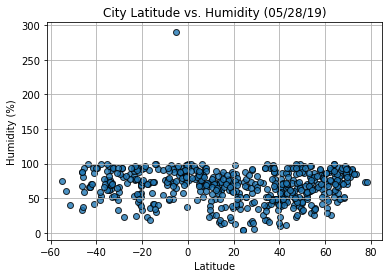

In [31]:
##Starter Graph

#### Latitude vs. Cloudiness Plot

Cloudiness variations for each city on March 3, 2020


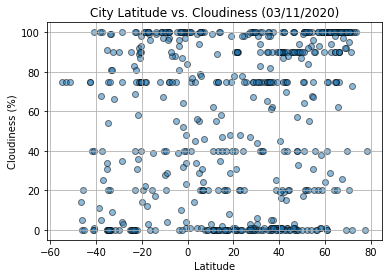

In [15]:
plt.scatter(cities_cleaned['Lat'],cities_cleaned['Cloudiness'],marker='o',alpha=0.5,edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (03/11/2020)")
plt.savefig('Latitude vs. Cloudiness Plot.PNG')
print("Cloudiness variations for each city on March 3, 2020")

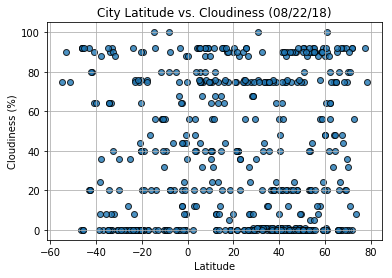

In [8]:
##Starter Graph

#### Latitude vs. Wind Speed Plot

Wind Speed variations for each city on March 3, 2020


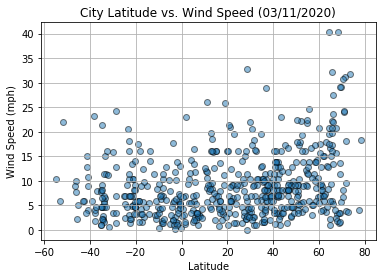

In [16]:
plt.scatter(cities_cleaned['Lat'],cities_cleaned['Wind Speed'],marker='o',alpha=0.5,edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (03/11/2020)")
plt.savefig('Latitude vs. Wind Speed Plot.PNG')
print("Wind Speed variations for each city on March 3, 2020")

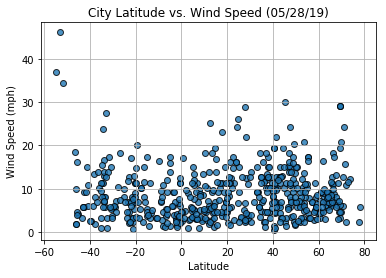

In [48]:
##Starter Graph

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames

In [17]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
northern_hemisphere = cities_cleaned.loc[(cities_cleaned['Lat']>=0)]
southern_hemisphere = cities_cleaned.loc[(cities_cleaned['Lat']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.18x + 92.96
The r-squared is: -0.8762667492306732


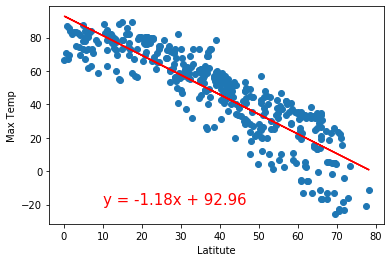

Max Temp variations of each city for Northern Hemisphere on March 3, 2020
Northern Hemisphere : As the Lattitude inceases Max Temp decreases


<Figure size 432x288 with 0 Axes>

In [27]:
n1x_values = northern_hemisphere['Lat']
n1y_values = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n1x_values, n1y_values)
regress_values = n1x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(n1x_values,n1y_values)
plt.plot(n1x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.PNG')
print("Max Temp variations of each city for Northern Hemisphere on March 3, 2020")
print("Northern Hemisphere : As the Lattitude inceases Max Temp decreases")

The r-squared is: -0.8151657406810827


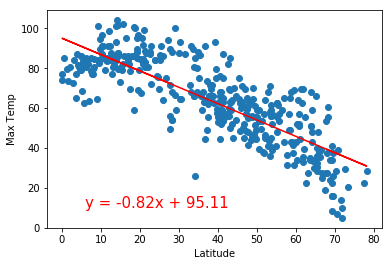

In [109]:
##Starter Graph

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.34x + 81.2
The r-squared is: 0.4724016916400905


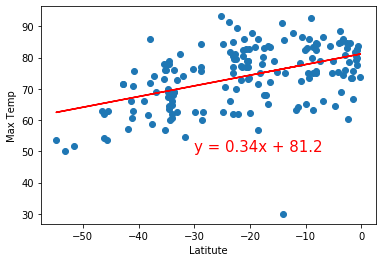

Max Temp variations of each city for Southern Hemisphere on March 3, 2020
Southern Hemisphere : Variability of Lattitude has a weak relation with Max. Temp, but we can still say it will increase as we go up the lattitude


<Figure size 432x288 with 0 Axes>

In [29]:
s1x_values = southern_hemisphere['Lat']
s1y_values = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s1x_values, s1y_values)
regress_values = s1x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(s1x_values,s1y_values)
plt.plot(s1x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.PNG')
print("Max Temp variations of each city for Southern Hemisphere on March 3, 2020")
print("Southern Hemisphere : Variability of Lattitude has a weak relation with Max. Temp, but we can still say it will increase as we go up the lattitude")

The r-squared is: 0.760263355051646


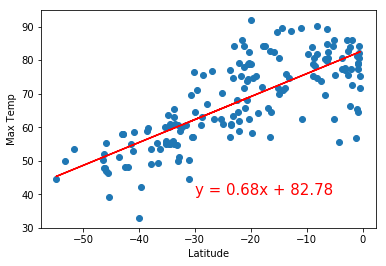

In [110]:
##Starter Graph

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.25x + 59.74
The r-squared is: 0.2312045962835836


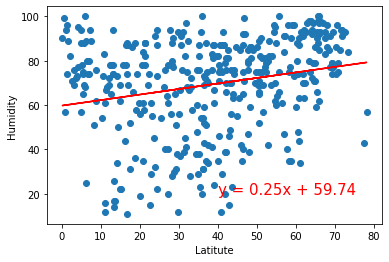

Humidity variations of each city for Northern Hemisphere on March 3, 2020
Northern Hemispere : Humidity isn't really effected by lattitude


<Figure size 432x288 with 0 Axes>

In [30]:
n2x_values = northern_hemisphere['Lat']
n2y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n2x_values, n2y_values)
regress_values = n2x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(n2x_values,n2y_values)
plt.plot(n2x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.PNG')
print("Humidity variations of each city for Northern Hemisphere on March 3, 2020")
print("Northern Hemispere : Humidity isn't really effected by lattitude")

The r-squared is: 0.10358336015746494


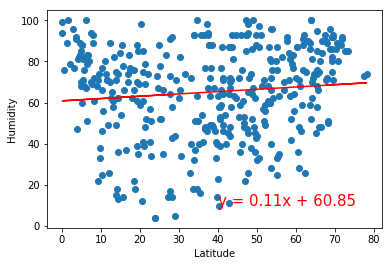

In [111]:
##Starter Graph

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.2x + 81.84
The r-squared is: 0.15232707744465843


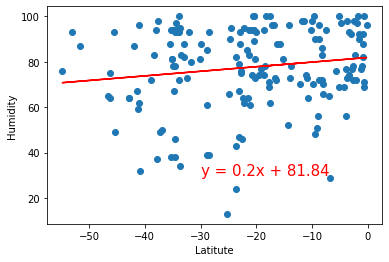

Humidity variations of each city for Southern Hemisphere on March 3, 2020
Southern Hemispere : Humidity isn't really effected by lattitude


<Figure size 432x288 with 0 Axes>

In [31]:
s2x_values = southern_hemisphere['Lat']
s2y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s2x_values, s2y_values)
regress_values = s2x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(s2x_values,s2y_values)
plt.plot(s2x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Humidity vs. Latitude Linear Regression.PNG')
print("Humidity variations of each city for Southern Hemisphere on March 3, 2020")
print("Southern Hemispere : Humidity isn't really effected by lattitude")

The r-squared is: 0.14689473425583055


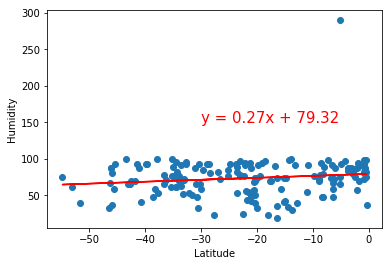

In [112]:
##Starter Graph

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.59x + 31.79
The r-squared is: 0.2919303372591343


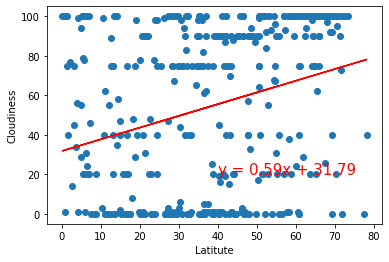

Cloudiness variations of each city for Northern Hemisphere on March 3, 2020
Northern Hemisphere : Cloudiness % isn't much effected by Lattitude


<Figure size 432x288 with 0 Axes>

In [36]:
n3x_values = northern_hemisphere['Lat']
n3y_values = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n3x_values, n3y_values)
regress_values = n3x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(n3x_values,n3y_values)
plt.plot(n3x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.PNG')
print("Cloudiness variations of each city for Northern Hemisphere on March 3, 2020")
print("Northern Hemisphere : Cloudiness % isn't much effected by Lattitude")

The r-squared is: -0.08733547918934018


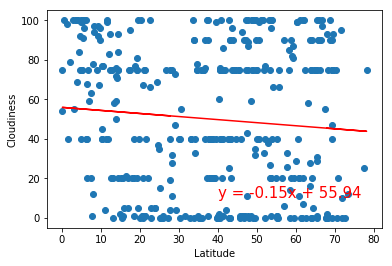

In [115]:
##Starter Graph

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.86x + 72.14
The r-squared is: 0.299288714986996


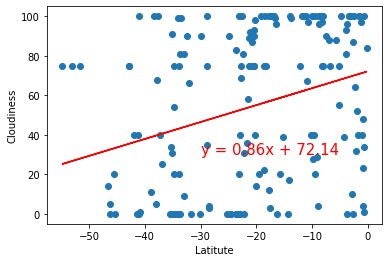

Cloudiness variations of each city for Southern Hemisphere on March 3, 2020
Southern Hemisphere : Cloudiness % isn't much effected by Lattitude


<Figure size 432x288 with 0 Axes>

In [37]:
s3x_values = southern_hemisphere['Lat']
s3y_values = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s3x_values, s3y_values)
regress_values = s3x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(s3x_values,s3y_values)
plt.plot(s3x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.PNG')
print("Cloudiness variations of each city for Southern Hemisphere on March 3, 2020")
print("Southern Hemisphere : Cloudiness % isn't much effected by Lattitude")

The r-squared is: 0.21881426893991618


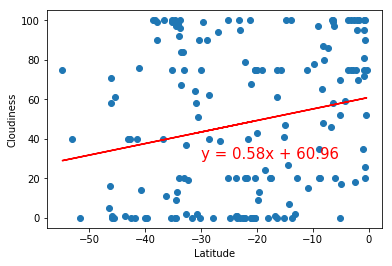

In [114]:
##Starter Graph

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.09x + 6.05
The r-squared is: 0.2718159066656609


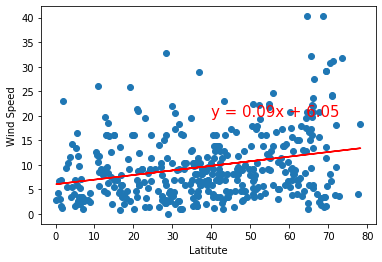

Wind Speed variations of each city for Northern Hemisphere on March 3, 2020
Northern Hemisphere : Slight chances that Wind speed will increase by Lattitude


<Figure size 432x288 with 0 Axes>

In [34]:
n4x_values = northern_hemisphere['Lat']
n4y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n4x_values, n4y_values)
regress_values = n4x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(n4x_values,n4y_values)
plt.plot(n4x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.PNG')
print("Wind Speed variations of each city for Northern Hemisphere on March 3, 2020")
print("Northern Hemisphere : Slight chances that Wind speed will increase by Lattitude")

The r-squared is: 0.1071382774388479


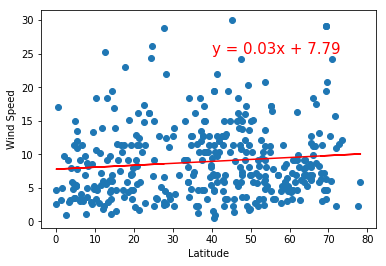

In [117]:
##Starter Graph

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.06x + 5.65
The r-squared is: -0.1719208478008113


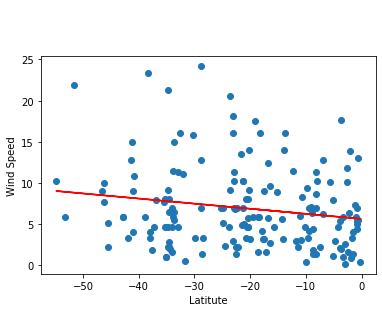

Wind variations of each city for Southern Hemisphere on March 3, 2020
Southern Hemisphere : Wind Speed isn't much effected by Lattitude


<Figure size 432x288 with 0 Axes>

In [38]:
s4x_values = southern_hemisphere['Lat']
s4y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s4x_values, s4y_values)
regress_values = s4x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(s4x_values,s4y_values)
plt.plot(s4x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="r")
plt.xlabel('Latitute')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.PNG')
print("Wind variations of each city for Southern Hemisphere on March 3, 2020")
print("Southern Hemisphere : Wind Speed isn't much effected by Lattitude")

The r-squared is: -0.322483077139538


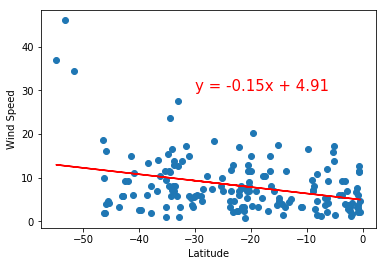

In [116]:
##Starter Graph

# There's a strong relationship between Temperature and Lattitude. While Temperature increases with Lattitude for Southern Hemishpere, reverse is true for Northern Hemishere.
# Weak realtionship is observed between Cloudiness vs Lattitude as well as Humidity Lattitude. But it is likely that we see slight change in intensity for both Cloudiness and Humidity  with change in Lattitude.
# Wind Speed also doesn't change much with Lattitude, but it is more likely to increase with Lattitude for Northern Hemisphere than Sourthern Hemisphere.  